<a href="https://colab.research.google.com/github/Malu2810/lets-grow-more-internship-task-2-/blob/main/stock_market_prediction_and_forcasting_using_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [35]:
df=pd.read_csv("/content/NSE-TATAGLOBAL.csv")

In [36]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [38]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [39]:
#date object to datetime series
df['Date']=pd.to_datetime(df.Date)

In [40]:
#setting date as index
df.set_index('Date',inplace=True)

In [41]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2035 entries, 2018-09-28 to 2010-07-21
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2035 non-null   float64
 1   High                  2035 non-null   float64
 2   Low                   2035 non-null   float64
 3   Last                  2035 non-null   float64
 4   Close                 2035 non-null   float64
 5   Total Trade Quantity  2035 non-null   int64  
 6   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 127.2 KB


In [43]:
df.isna().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [44]:
#sorting with respect to date index
df.sort_index(ascending=True,inplace=True)

In [49]:
#data processing
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0,1))
df1=mms.fit_transform(df[['Open']])
print('Shape of the scaled data matrix: ', df1.shape)

Shape of the scaled data matrix:  (2035, 1)


In [50]:
df1 =pd.DataFrame(df1)
train = df1[:1000]
test = df1[1000:]
print('Shape of train data: ', train.shape)
print('Shape of test data: ', test.shape)

Shape of train data:  (1000, 1)
Shape of test data:  (1035, 1)


In [68]:
def prepare_data(data):
    databatch = 7
    x_list = []
    y_list = []
    data = list(data[0])
    for i in range(len(data)-databatch-1):
        x_list.append(data[i:i+databatch])
        y_list.append(data[i+databatch+1])

    X_data = np.array(x_list)
    X_data = np.expand_dims(X_data,axis=1)
    X_data = np.reshape(X_data, (X_data.shape[0], X_data.shape[1], X_data.shape[2]))
    y_data = np.array(y_list)
    y_data = np.expand_dims(y_data,axis=1)

    return X_data, y_data

In [69]:
X_train, y_train = prepare_data(train)
X_test, y_test = prepare_data(test)
print('X_train Shape : ', X_train.shape, 'y_train shape :', y_train.shape)
print('X_test Shape  : ', X_test.shape, ' y_test shape  :', y_test.shape)

X_train Shape :  (992, 1, 7) y_train shape : (992, 1)
X_test Shape  :  (1027, 1, 7)  y_test shape  : (1027, 1)


In [70]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam

In [71]:
def lstm_model(x_data, y_data, num_epochs, batch_size, learning_rate):
    model = Sequential()
    model.add(LSTM(100, input_shape=(x_data.shape[1], x_data.shape[2]), return_sequences=True))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(25))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    history = model.fit(x_data, y_data, validation_split=0.25, epochs=num_epochs, batch_size=batch_size)
    return model, history

In [72]:
history = lstm_model(X_train, y_train, num_epochs=15, batch_size=100, learning_rate=.001)

Epoch 1/15
8/8 [==============================] - 8s 195ms/step - loss: 0.0285 - val_loss: 0.0658
Epoch 2/15
8/8 [==============================] - 0s 15ms/step - loss: 0.0202 - val_loss: 0.0457
Epoch 3/15
8/8 [==============================] - 0s 15ms/step - loss: 0.0116 - val_loss: 0.0227
Epoch 4/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0057 - val_loss: 0.0044
Epoch 5/15
8/8 [==============================] - 0s 15ms/step - loss: 0.0052 - val_loss: 0.0016
Epoch 6/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0042 - val_loss: 0.0051
Epoch 7/15
8/8 [==============================] - 0s 15ms/step - loss: 0.0033 - val_loss: 0.0051
Epoch 8/15
8/8 [==============================] - 0s 16ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 9/15
8/8 [==============================] - 0s 15ms/step - loss: 0.0017 - val_loss: 8.2174e-04
Epoch 10/15
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - val_loss: 9.2873e-04
Epoch 11/15
8/8 [===

In [73]:
print(history)

(<keras.src.engine.sequential.Sequential object at 0x7de58a847280>, <keras.src.callbacks.History object at 0x7de582ddf3d0>)


In [74]:
def predicting(data, y_real):
    predicted_data = history[0].predict(data)
    # Invert scaling process to get the normal values range for the features
    predicted_data = mms.inverse_transform(predicted_data)
    y_real = mms.inverse_transform(y_real)
    print(y_real)
    return predicted_data, y_real

In [75]:
train_prediction, y_train = predicting(X_train, y_train)
test_prediction, y_test = predicting(X_test, y_test)

31/31 [==============================] - 1s 3ms/step
[[0.14679643]
 [0.15085158]
 [0.15166261]
 [0.14557989]
 [0.13381995]
 [0.12530414]
 [0.12895377]
 [0.13240065]
 [0.12935929]
 [0.13098135]
 [0.14132198]
 [0.12489862]
 [0.11780211]
 [0.11719384]
 [0.12530414]
 [0.13341444]
 [0.15145985]
 [0.14152474]
 [0.15044607]
 [0.15369019]
 [0.15287916]
 [0.14557989]
 [0.16443633]
 [0.17477697]
 [0.16788321]
 [0.17092457]
 [0.17396594]
 [0.19018654]
 [0.18896999]
 [0.19221411]
 [0.18268451]
 [0.17741281]
 [0.17396594]
 [0.16909976]
 [0.16788321]
 [0.17619627]
 [0.16991079]
 [0.16423358]
 [0.1717356 ]
 [0.18349554]
 [0.17639903]
 [0.17112733]
 [0.16707218]
 [0.16301703]
 [0.175588  ]
 [0.17802109]
 [0.19018654]
 [0.19870235]
 [0.2175588 ]
 [0.21654501]
 [0.21654501]
 [0.20600162]
 [0.21553122]
 [0.21796431]
 [0.19870235]
 [0.20437956]
 [0.19525547]
 [0.19748581]
 [0.20640714]
 [0.19809408]
 [0.19505272]
 [0.19099757]
 [0.19383617]
 [0.18876723]
 [0.18207624]
 [0.18004866]
 [0.18207624]
 [0.17680

In [76]:
import math
from sklearn.metrics import mean_squared_error
print('Training Data Errors')
print(mean_squared_error(y_train[0], train_prediction[0]),'\n')
print('Test Data Errors')
print(mean_squared_error(y_test[0], test_prediction[0]))

Trainin Data Errors
1.7640662322414574e-06 

Test Data Errors
0.0010117019528568267


Text(0.5, 1.0, 'Original Plot of Closing Price of Stock')

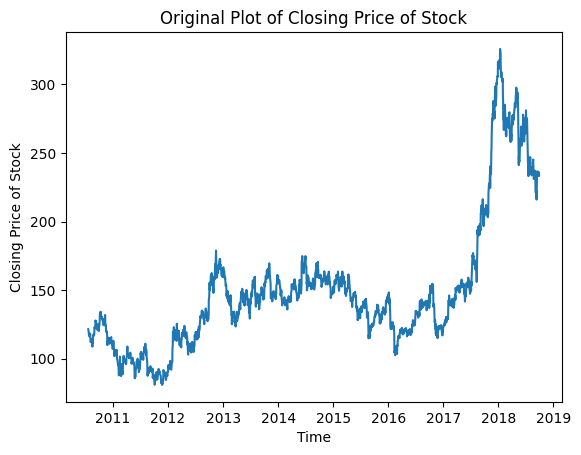

In [78]:
plt.plot(df.index,df['Close'])
plt.xlabel('Time')
plt.ylabel('Closing Price of Stock')
plt.title('Original Plot of Closing Price of Stock')